In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("df_cleaned.parquet")

In [4]:
# new variables

# mid estimate
df['price_estimate_mid_usd'] = (
    df['price_estimate_min_usd_zeroied'] + df['price_estimate_max_usd_zeroied']
) / 2

# price over mid
valid = (df['price_usd_zeroied'] > 0) & (df['price_estimate_mid_usd'] > 0)
df['price_over_mid'] = np.nan
df.loc[valid, 'price_over_mid'] = (
    df.loc[valid, 'price_usd_zeroied'] /
    df.loc[valid, 'price_estimate_mid_usd']
)

# auction month and year
df['auction_month'] = df['auction_start_date'].dt.month
df['auction_month_name'] = df['auction_start_date'].dt.month_name()
df['auction_year'] = df['auction_start_date'].dt.year
df = df[~df['auction_year'].between(1986, 2006)] # drop years 1986-1994

In [5]:
# convert all prices to hammer price
df['price_kind'] = (
    df['price_kind']
    .astype(str)
    .str.strip()
    .str.lower()
)

df['price_hammer_usd_zeroied'] = np.where(
    df['price_kind'] == 'premium',
    df['price_usd_zeroied'] / 1.1375,
    df['price_usd_zeroied']
)

In [6]:
df

,raw_lot_id,auction_house_name,raw_auction_id,auction_location,auction_name,auction_num,auction_start_date,lot_image_url,lot_num,price_estimate_min,...,artist_birth,artist_id,auction_house_grouped,auction_location_grouped,price_estimate_mid_usd,price_over_mid,auction_month,auction_month_name,auction_year,price_hammer_usd_zeroied
0,298153205,Sotheby's,506709,New York,A Scholar Collects,N11437,2024-01-31,https://s3-us-west-2.amazonaws.com/ciqcrawler/...,10,12000,...,1755,<NA>,Sotheby's,New York,14000.0,1.814286,1.0,January,2024.0,2.232967e+04
1,298153206,Sotheby's,506709,New York,A Scholar Collects,N11437,2024-01-31,https://s3-us-west-2.amazonaws.com/ciqcrawler/...,9,12000,...,1755,<NA>,Sotheby's,New York,14000.0,3.175000,1.0,January,2024.0,3.907692e+04
2,298153207,Sotheby's,506709,New York,A Scholar Collects,N11437,2024-01-31,https://s3-us-west-2.amazonaws.com/ciqcrawler/...,20,60000,...,1675,<NA>,Sotheby's,New York,70000.0,2.721429,1.0,January,2024.0,1.674725e+05
3,298153212,Sotheby's,506709,New York,A Scholar Collects,N11437,2024-01-31,https://s3-us-west-2.amazonaws.com/ciqcrawler/...,11,700000,...,1755,<NA>,Sotheby's,New York,850000.0,3.629412,1.0,January,2024.0,2.712088e+06
4,298153213,Sotheby's,506709,New York,A Scholar Collects,N11437,2024-01-31,https://s3-us-west-2.amazonaws.com/ciqcrawler/...,8,120000,...,1755,<NA>,Sotheby's,New York,150000.0,2.032000,1.0,January,2024.0,2.679560e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585547,251423663,Sotheby's,263562,New York,American Art,N10375,2020-06-26,https://s3-us-west-2.amazonaws.com/ciqcrawler/...,45,60000,...,1820,6555,Sotheby's,New York,70000.0,NaN,6.0,June,2020.0,0.000000e+00
4585548,251423664,Sotheby's,263562,New York,American Art,N10375,2020-06-26,https://s3-us-west-2.amazonaws.com/ciqcrawler/...,48,80000,...,1804,179,Sotheby's,New York,100000.0,0.937500,6.0,June,2020.0,8.241758e+04
4585549,251423665,Sotheby's,263562,New York,American Art,N10375,2020-06-26,https://s3-us-west-2.amazonaws.com/ciqcrawler/...,49,60000,...,1804,179,Sotheby's,New York,70000.0,4.464286,6.0,June,2020.0,2.747253e+05
4585550,251423670,Sotheby's,263562,New York,American Art,N10375,2020-06-26,https://s3-us-west-2.amazonaws.com/ciqcrawler/...,51,20000,...,1830,208,Sotheby's,New York,25000.0,0.850000,6.0,June,2020.0,1.868132e+04


# Summary statistics

In [7]:
print("fraction of lots bought in = ", df['bought_in'].mean())

fraction of lots bought in =  0.3482812345217155


In [8]:
# basic summary
summary_rel = df[['price_usd_zeroied',
                  'price_estimate_min_usd_zeroied',
                  'price_estimate_max_usd_zeroied',
                  'price_estimate_mid_usd',
                  'price_over_mid']]

summary_rel.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

,price_usd_zeroied,price_estimate_min_usd_zeroied,price_estimate_max_usd_zeroied,price_estimate_mid_usd,price_over_mid
count,3523080.0,3523080.0,3523080.0,3523080.0,2.296109e+06
mean,40311.064626,33832.158617,48131.235787,40981.697202,1.428186e+00
std,541304.625874,400980.760209,568272.433569,482945.064675,1.510110e+01
min,-1.0,-1.0,-1.0,-1.0,1.360748e-06
10%,0.0,545.0,750.0,650.0,6.000000e-01
25%,0.0,1000.0,1436.0,1250.0,8.000000e-01
50%,1181.0,2987.0,4000.0,3500.0,1.036582e+00
75%,7322.0,9805.0,13027.0,11396.0,1.500124e+00
90%,34482.0,33032.0,48146.0,40000.0,2.312500e+00
99%,593591.34,482309.41,687043.0,583584.0,6.675421e+00


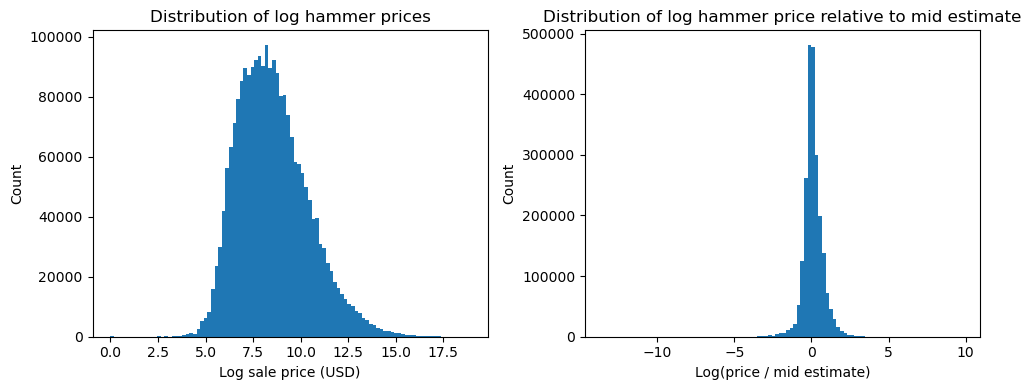

In [9]:
# distribution of prices

mask = df['price_usd_zeroied'] > 0
log_prices = np.log(df.loc[mask, 'price_usd_zeroied'])

mask_rel = (df['price_over_mid'] > 0) & np.isfinite(df['price_over_mid'])
log_price_over_mid = np.log(df.loc[mask_rel, 'price_over_mid'])

# plot
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# left: log prices
axes[0].hist(log_prices, bins=100)
axes[0].set_xlabel("Log sale price (USD)")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of log hammer prices")

# right: log(price/mid)
axes[1].hist(log_price_over_mid, bins=100)
axes[1].set_xlabel("Log(price / mid estimate)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of log hammer price relative to mid estimate")

plt.tight_layout()
plt.savefig("log_price_histograms.pdf", bbox_inches="tight")
plt.show()

In [10]:
# summary of variables
target_vars = [
    'auction_house_name',
    'auction_location',
    'medium_final',
    'artist_name'
]

for var in target_vars:
    print("\n" + "="*70)
    print(f"Top 5 categories for: {var}")
    
    # top 5 most frequent values
    top5 = df[var].value_counts().head(5).index
    
    # summary statistics for each
    summary = df[df[var].isin(top5)].groupby(var).agg(
        avg_sale_price = ('price_usd_zeroied', 'mean'),
        avg_est_low = ('price_estimate_min_usd_zeroied', 'mean'),
        avg_est_high = ('price_estimate_max_usd_zeroied', 'mean'),
        count = (var, 'size')
    ).sort_values('count', ascending=False)
    
    print(summary)


Top 5 categories for: auction_house_name
                    avg_sale_price    avg_est_low   avg_est_high   count
auction_house_name                                                      
Christie's           147348.581059    115067.7969  166922.856081  360029
Sotheby's            173669.747812  137532.103592  196065.813441  306557
Bonhams               11222.562521   11380.712903   16626.976568  192430
Dorotheum              9232.876764     9948.75768   13444.516868  118715
Phillips              72977.224157   65187.102944   93864.489396   84075

Top 5 categories for: auction_location
                  avg_sale_price    avg_est_low   avg_est_high   count
auction_location                                                      
Paris               16715.113796   14343.184837   20040.493629  447934
New York           141351.257774  117310.910214  168496.897821  421478
London             127043.391579  102677.507255   147918.38721  278771
Beijing              75105.29037   61009.290684   85

In [11]:
# summary of top 5 months
top5_months = df['auction_month'].value_counts().head(5).index

print("=" * 70)
print("Top 5 months by number of lots sold (aggregated across all years)")

month_summary = (
    df[df['auction_month'].isin(top5_months)]
    .groupby(['auction_month', 'auction_month_name'])
    .agg(
        avg_sale_price = ('price_usd_zeroied', 'mean'),
        avg_est_low    = ('price_estimate_min_usd_zeroied', 'mean'),
        avg_est_high   = ('price_estimate_max_usd_zeroied', 'mean'),
        count          = ('auction_month', 'size')
    )
    .sort_values('count', ascending=False)
)

print(month_summary)

Top 5 months by number of lots sold (aggregated across all years)
                                  avg_sale_price   avg_est_low  avg_est_high  \
auction_month auction_month_name                                               
11.0          November              64187.128082  56858.209218  81180.207358   
6.0           June                  38284.464313  32229.825852  45115.361306   
5.0           May                   73568.332322  59469.972412  84396.838882   
12.0          December              25469.316931    23132.9097  32313.860914   
10.0          October               28653.905895   25159.70216  35813.453807   

                                   count  
auction_month auction_month_name          
11.0          November            479171  
6.0           June                464376  
5.0           May                 415471  
12.0          December            368405  
10.0          October             353223  


In [12]:
# yearly summary 
yearly = df.groupby('auction_year').agg(
    lots=('raw_lot_id', 'size'),
    avg_price=('price_usd_zeroied', 'mean'),
    median_price=('price_usd_zeroied', 'median'),
    bought_in_rate=('bought_in', 'mean')
)

print(yearly)

                lots      avg_price  median_price  bought_in_rate
auction_year                                                     
2007.0        207844   45095.882705        3662.0        0.176175
2008.0        233962   34447.632385        1300.0        0.391534
2009.0        207154   23353.936762         975.0         0.40172
2010.0        238363   34392.797393        1175.0        0.361826
2011.0        268041   39898.347962        1335.0        0.348234
2012.0        294820   32588.389512        1033.0        0.369456
2013.0        319008   33971.869207        1032.0        0.358414
2014.0        383305   29835.808873         636.0        0.377498
2015.0        411501   26765.433037         590.0        0.378585
2016.0        350403   23537.901502         693.0        0.369649
2017.0        240060   37092.594343        1061.0        0.378834
2018.0         95305   97664.821919        3750.0        0.276628
2019.0         77978  102662.955616        4792.0        0.267422
2020.0    

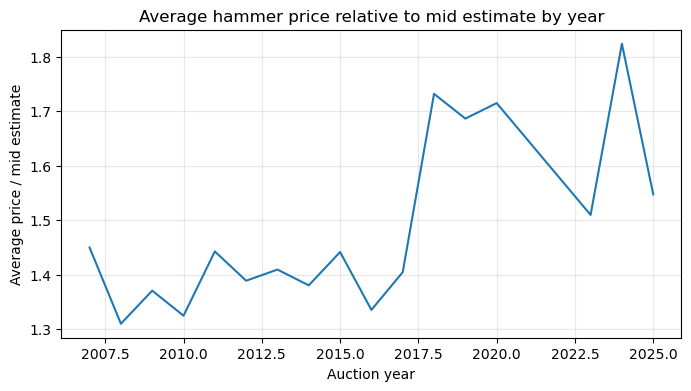

In [13]:
# price over mid estimate by year
yearly_rel = (
    df.loc[valid]
      .groupby('auction_year')['price_over_mid']
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,4))
plt.plot(yearly_rel['auction_year'], yearly_rel['price_over_mid'])
plt.xlabel("Auction year")
plt.ylabel("Average price / mid estimate")
plt.title("Average hammer price relative to mid estimate by year")
plt.grid(True, alpha=0.3)
plt.show()

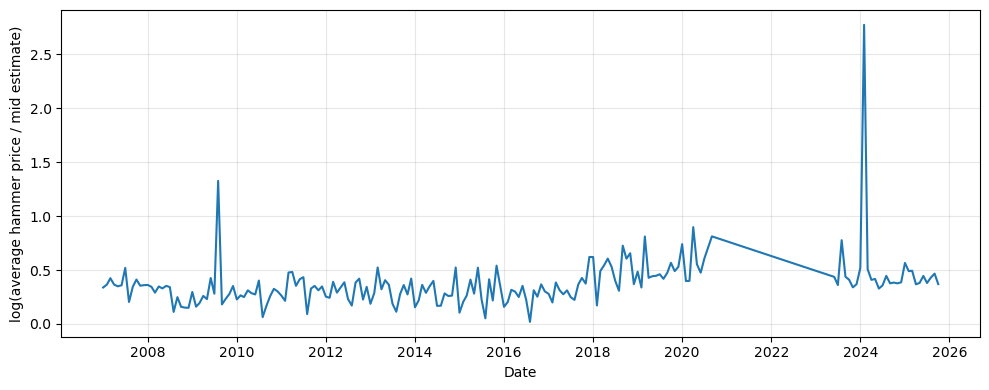

In [14]:
# price over mid estimate by month
df['auction_month'] = df['auction_start_date'].dt.to_period('M')

monthly_rel = (
    df.loc[valid]
      .groupby('auction_month')['price_over_mid']
      .mean()
      .reset_index()
)

monthly_rel['auction_month'] = monthly_rel['auction_month'].dt.to_timestamp()

plt.figure(figsize=(10,4))
plt.plot(monthly_rel['auction_month'], np.log(monthly_rel['price_over_mid']))
plt.xlabel("Date")
plt.ylabel("log(average hammer price / mid estimate)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("log_price_monthly.pdf", bbox_inches="tight")
plt.show()

# Regression

In [15]:
import statsmodels.formula.api as smf

In [21]:
# ---------- 1. Subset to valid observations ----------

hed_mask = (
    df['price_over_mid'].notna()
    & (df['price_over_mid'] > 0)
    & df['auction_house_name'].notna()
)

hed = df.loc[hed_mask].copy()

# dependent variable
hed['log_price_over_mid'] = np.log(hed['price_over_mid'])

# date-derived controls
hed['auction_year']  = hed['auction_start_date'].dt.year
hed['auction_month'] = hed['auction_start_date'].dt.month   # 1–12


# ---------- 2. Numeric controls (force to plain float) ----------

num_cols = [
    'artwork_creation_year',
    'artwork_measurements_width',
    'artwork_measurements_height',
    'artist_birth',
    'log_price_over_mid',
]

for c in num_cols:
    hed[c] = pd.to_numeric(hed[c], errors='coerce').astype(float)


# ---------- 3. Collapse high-cardinality categoricals to top 20 + "Other" ----------

def collapse_to_top_k(series, k=20, missing_label="Missing"):
    s = series.fillna(missing_label).astype(str)
    top = s.value_counts().head(k).index
    collapsed = np.where(s.isin(top), s, "Other")
    return pd.Series(collapsed, index=series.index, dtype="category")

cats_to_collapse = [
    'auction_house_name',   # main variable of interest
    'medium_final',
    'artist_name',
    'artist_nationality',
    'auction_location',
    'currency',
]

for col in cats_to_collapse:
    hed[col + '_top20'] = collapse_to_top_k(hed[col])

# year/month as categorical FEs
hed['auction_year']  = hed['auction_year'].astype('category')
hed['auction_month'] = hed['auction_month'].astype('category')


# ---------- 4. Hedonic regression ----------

formula = (
    "log_price_over_mid "
    "~ C(auction_house_name_top20)"
    " + artwork_creation_year"
    " + artwork_measurements_width"
    " + artwork_measurements_height"
    " + artist_birth"
    " + C(medium_final_top20)"
    " + C(artist_name_top20)"
    " + C(artist_nationality_top20)"
    " + C(auction_location_top20)"
    " + C(currency_top20)"
    " + C(auction_year)"
    " + C(auction_month)"
)

model = smf.ols(formula=formula, data=hed).fit(cov_type="HC3")
print(model.summary())


# ---------- 5. Auction-house effects as percentage differences ----------

ah_coefs = model.params.filter(like="C(auction_house_name_top20)")
ah_pct_effect = (np.exp(ah_coefs) - 1) * 100
print(ah_pct_effect.sort_values())

                            OLS Regression Results                            
Dep. Variable:     log_price_over_mid   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1335.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:18:12   Log-Likelihood:            -9.7144e+05
No. Observations:             1155389   AIC:                         1.943e+06
Df Residuals:                 1155248   BIC:                         1.945e+06
Df Model:                         140                                         
Covariance Type:                  HC3                                         
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/usr/licensed/anaconda3/2025.6/lib/python3.13/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 142, but rank is 140
  warnings.warn('covariance of constraints does not have full '


In [22]:
import re

def find_baseline(var, data, model):
    """
    var: name of the collapsed categorical column, e.g. 'auction_house_name_top20'
    data: hed
    model: statsmodels OLS results object
    """
    # all categories that exist in the data
    cats = data[var].astype('category').cat.categories.tolist()
    
    # parameter names for this variable
    prefix = f"C({var})[T."
    params_for_var = [p for p in model.params.index if p.startswith(prefix)]
    
    # strip the Patsy prefix/suffix to get the category labels that have coefs
    used_cats = [re.sub(rf"^C\({var}\)\[T\.", "", p).rstrip("]") for p in params_for_var]

    # baseline = categories that never appear with a [T.xxx] coefficient
    baseline = [c for c in cats if c not in used_cats]
    return cats, used_cats, baseline

for col in [
    "auction_house_name_top20",
    "medium_final_top20",
    "artist_name_top20",
    "artist_nationality_top20",
    "auction_location_top20",
    "currency_top20",
]:
    cats, used, baseline = find_baseline(col, hed, model)
    print(f"{col}:")
    print("  categories:", cats)
    print("  baseline (omitted):", baseline)
    print()

auction_house_name_top20:
  categories: ['Artcurial', 'Bonhams', 'Bruun Rasmussen Kunstauktioner', 'Bukowskis', 'China Guardian', "Christie's", 'Cornette de Saint Cyr', 'Dorotheum', 'Heritage Auctions', 'Ketterer Kunst', 'Meeting Art', 'Millon & Associes', 'Other', 'Phillips', 'Poly International Auction', 'Rago Arts & Auction Center', 'Skinner', "Sotheby's", 'Stockholms Auktionsverk', 'Swann Galleries', 'Van Ham']
  baseline (omitted): ['Artcurial']

medium_final_top20:
  categories: ['Missing', 'ceramics', 'furniture', 'jewelry', 'nft', 'other', 'paintings', 'photographs', 'prints', 'sculpture', 'undetermined', 'works on paper']
  baseline (omitted): ['Missing']

artist_name_top20:
  categories: ['Alexander Calder', 'Andy Warhol', 'Anonymous', 'Arman', 'Attributed to Qi Baishi', 'Attributed to Rembrandt Harmensz van Rijn', 'Damien Hirst', 'David Hockney', 'Henri Matisse', 'Joan Miro', 'Marc Chagall', 'Other', 'Pablo Picasso', 'Pu Ru', 'Roy Lichtenstein', 'Salvador Dali', 'Sam Francis